In this notebook, I will attempt to establish a baseline model. I will be using the raw data, and will not be doing any feature engineering, other than dropping the rows that have no associated scores. The task will be a raw classification, with no forecasting, in order to get a feel for how the CatBoost model can perform initially.

- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train_timeseries.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [4]:
train.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

- Dropping Rows that do not have the target variable (narrowing to 1 measurement per week)

In [6]:
train_with_score = train.dropna()
print(train_with_score.info())
print(train_with_score.isnull().sum())
train_with_score.to_csv('../data/train_with_score.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756796 entries, 3 to 19300675
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 462.7+ MB
None
fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M         

- Simplifying to a classification problem of Drought Levels 1-5 rather than a regression problem on continuous target variable

In [8]:
train_with_score['score'].value_counts()

0.0000    1480827
1.0000     219135
2.0000     123789
3.0000      82801
4.0000      45841
           ...   
0.1145          1
2.0172          1
0.6750          1
1.3998          1
0.6060          1
Name: score, Length: 55395, dtype: int64

In [9]:
train_with_score['score'] = train_with_score['score'].round().astype(int)
train_with_score['score'].value_counts()

/tmp/ipykernel_504812/3614264701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_with_score['score'] = train_with_score['score'].round().astype(int)


0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

- Install initial Gradient Boosted Tree model

In [10]:
%pip install catboost

  Using cached catboost-1.1.1-cp310-none-manylinux1_x86_64.whl (76.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from catboost import CatBoostClassifier


train_with_score['date'] = pd.to_datetime(train_with_score['date'], format='%Y-%m-%d')

model = CatBoostClassifier()
X = train_with_score.drop(['score'], axis=1)
y = train_with_score['score']
model.fit(X, y)

/tmp/ipykernel_504812/8157234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_with_score['date'] = pd.to_datetime(train_with_score['date'], format='%Y-%m-%d')


Learning rate set to 0.118518
0:	learn: 1.6135903	total: 1.23s	remaining: 20m 31s
1:	learn: 1.5049359	total: 2.44s	remaining: 20m 18s
2:	learn: 1.4288628	total: 3.54s	remaining: 19m 35s
3:	learn: 1.3711656	total: 4.85s	remaining: 20m 8s
4:	learn: 1.3275094	total: 6.21s	remaining: 20m 34s
5:	learn: 1.2933512	total: 7.33s	remaining: 20m 14s
6:	learn: 1.2640165	total: 8.63s	remaining: 20m 24s
7:	learn: 1.2407648	total: 9.82s	remaining: 20m 17s
8:	learn: 1.2223725	total: 10.8s	remaining: 19m 48s
9:	learn: 1.2061857	total: 12s	remaining: 19m 44s
10:	learn: 1.1927869	total: 13.3s	remaining: 19m 54s
11:	learn: 1.1802923	total: 14.6s	remaining: 19m 58s
12:	learn: 1.1696903	total: 15.9s	remaining: 20m 3s
13:	learn: 1.1612530	total: 17s	remaining: 19m 54s
14:	learn: 1.1526066	total: 18.2s	remaining: 19m 54s
15:	learn: 1.1464702	total: 19.5s	remaining: 19m 58s
16:	learn: 1.1406065	total: 20.8s	remaining: 19m 59s
17:	learn: 1.1360710	total: 22.2s	remaining: 20m 11s
18:	learn: 1.1308674	total: 23.5

In [15]:
import pickle
pickle.dump(model, open('initial_catboost_model.pkl', 'wb'))

In [1]:
import pickle
model = pickle.load(open('initial_catboost_model.pkl', 'rb'))

In [3]:
import pandas as pd
test_with_score = pd.read_csv('../data/test_with_rounded_score.csv')
test_with_score = test_with_score.dropna()
test_with_score['score'] = test_with_score['score'].round().astype(int)

In [4]:
test_with_score['date'] = pd.to_datetime(test_with_score['date'], format='%Y-%m-%d')

In [5]:
preds = model.predict(test_with_score.drop(['score'], axis=1))

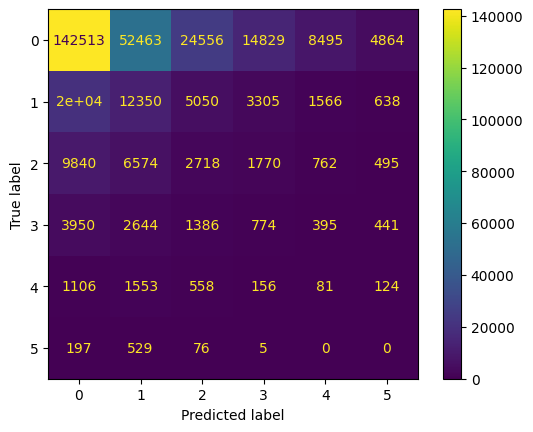

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_test = test_with_score['score']
cm = confusion_matrix(Y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

In [8]:
import pickle
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

test_with_score = pd.read_csv('../data/test_with_rounded_score.csv')
test_with_score['date'] = pd.to_datetime(test_with_score['date'], format='%Y-%m-%d')

model = pickle.load(open('initial_catboost_model.pkl', 'rb'))
X = test_with_score.drop(['score'], axis=1)
y = test_with_score['score']
preds = model.predict(X)

print("Model performance:\n")
print("F1 score: {}".format(f1_score(y, preds, average='weighted')))
print("Precision score: {}".format(precision_score(y, preds, average='weighted')))
print("Recall score: {}".format(recall_score(y, preds, average='weighted')))



Model performance:

F1 score: 0.5444573889176292
Precision score: 0.6382209495402256
Recall score: 0.48549365692222834


In [5]:
preds.shape

(326340, 1)

As we can see, the model is not great, and skews towards predicting 0's for every row. This highlights the imbalance of the data, and we likely need to use additional feature engineering to account for this. One thing to note is that it is better for the lower-severity drought classes than the high-severity drought classes. This reinforces the hypothesis that dataset imbalance is severely affecting the model. 

Secondly, we did no feature engineering with regards to the columns of the data. There are certain features present that currently are used improperly, or are unnecessary. EDA may be necessary. 